# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\shoun\anaconda3\lib\site-packages (5.0.0)
Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

In [5]:
big_df = pd.read_csv("NLSY97_Variable_Names_and_Descriptions.csv")

In [6]:
big_df

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
...,...,...,...
117,URBAN,D,Living in an urban area
118,REGNE,D,Census region North east
119,REGNC,D,Census region North central
120,REGW,D,Census region West


In [7]:
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,nan,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",...,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
print('What is the shape of `df_data`? ')
print(f"The shape of the datatset is {df_data.shape}")
print()
print('How many rows and columns does it have?')
print(f"Rows: {df_data.shape[0]}\nColumns: {df_data.shape[1]}")
print()
print('What are the column names?')
print(f"Column names: {df_data.columns}")
print()
print('Are there any NaN values or duplicates?')
print(f"NaN values: {df_data.isna().any()}\nDuplicates values: {df_data.duplicated()}")
print()

What is the shape of `df_data`? 
The shape of the datatset is (2000, 96)

How many rows and columns does it have?
Rows: 2000
Columns: 96

What are the column names?
Column names: Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
    

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [9]:
NaN_True = df_data.isna().any()[df_data.isna().any().values == True]
df_data[NaN_True.index]

,AGEMBTH,HHINC97,POVRAT97,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,PRFSTYAN,PRFSTYAE,SFR,SMR,JOBS
0,24.00,"64,000.00",402.00,14.00,14.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,12.00,12.00,6.00
1,32.00,"6,000.00",38.00,12.00,12.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,16.00,12.00,nan
2,23.00,"88,252.00",555.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.00,3.00
3,30.00,nan,nan,6.00,4.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,14.00,14.00,10.00
4,23.00,"44,188.00",278.00,11.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,14.00,16.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19.00,"6,000.00",38.00,0.00,nan,1.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,12.00,3.00
1996,28.00,"50,000.00",314.00,9.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,12.00,12.00,9.00
1997,29.00,"77,610.00",488.00,12.00,nan,0.00,0.00,0.00,1.00,nan,nan,nan,nan,16.00,16.00,8.00
1998,23.00,"69,300.00",549.00,8.00,6.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,12.00,17.00,7.00


In [10]:
mean_df = df_data.describe().iloc[1]

In [11]:
len(NaN_True.index)

16

In [12]:
NaN_True.index

Index(['AGEMBTH', 'HHINC97', 'POVRAT97', 'PRMONM', 'PRMONF', 'PRMSTYUN',
       'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN',
       'PRFSTYAE', 'SFR', 'SMR', 'JOBS'],
      dtype='object')

## Descriptive Statistics

In [13]:
[df_data[NaN_True.index[i]].value_counts() for i in range(len(NaN_True))]

[26.00    167
 25.00    155
 23.00    153
 28.00    147
 24.00    137
 27.00    126
 29.00    117
 30.00    113
 22.00    110
 31.00     88
 32.00     84
 21.00     83
 20.00     73
 19.00     65
 33.00     59
 34.00     57
 18.00     53
 35.00     41
 17.00     26
 37.00     23
 36.00     22
 38.00     13
 16.00     12
 39.00      8
 40.00      7
 41.00      4
 15.00      4
 14.00      3
 12.00      2
 43.00      2
 13.00      1
 45.00      1
 Name: AGEMBTH, dtype: int64,
 246,474.00    40
 35,000.00     17
 65,000.00     14
 75,000.00     14
 45,000.00     13
               ..
 7,900.00       1
 48,400.00      1
 28,180.00      1
 29,200.00      1
 41,288.00      1
 Name: HHINC97, Length: 756, dtype: int64,
 1,627.00    45
 283.00      15
 251.00      13
 347.00      13
 294.00      13
             ..
 245.00       1
 506.00       1
 430.00       1
 165.00       1
 649.00       1
 Name: POVRAT97, Length: 527, dtype: int64,
 12.00    159
 11.00    152
 10.00    146
 9.00     125
 8.00

In [14]:
cat_cols = big_df[big_df["Variable Type"] == "C"]["Personal variables"].tolist()
cat_cols

['AGE',
 'BYEAR',
 'HEIGHT',
 'WEIGHT04',
 'WEIGHT11',
 'S',
 'ASVABAR',
 'ASVABWK',
 'ASVABPC',
 'ASVABNO',
 'ASVABCS',
 'ASVABC',
 'ASVABC4',
 'VERBAL',
 'ASVABMV',
 'SM',
 'SF',
 'SMR',
 'SFR',
 'SIBLINGS',
 'AGEMBTH',
 'HHINC97',
 'POVRAT97',
 'PRMONM',
 'PRMONF',
 'EARNINGS',
 'HOURS',
 'TENURE',
 'EXP',
 'JOBS']

In [15]:
# for i in range(len(cat_cols)):
#     df_data[cat_cols[i]] = df_data[cat_cols[i]].astype("category")

In [16]:
mode_replace = df_data[cat_cols].mode().iloc[0]
mode_replace

AGE             29.00
BYEAR        1,982.00
HEIGHT          67.00
WEIGHT04       140.00
WEIGHT11       180.00
S               16.00
ASVABAR          0.37
ASVABWK          0.37
ASVABPC         -0.35
ASVABNO         -0.35
ASVABCS          0.98
ASVABC          -2.00
ASVABC4         -1.89
VERBAL          -1.50
ASVABMV    100,000.00
SM              12.00
SF              12.00
SMR             12.00
SFR             12.00
SIBLINGS         1.00
AGEMBTH         26.00
HHINC97    246,474.00
POVRAT97     1,627.00
PRMONM          12.00
PRMONF           8.00
EARNINGS        15.00
HOURS           40.00
TENURE           0.31
EXP              8.69
JOBS             4.00
Name: 0, dtype: float64

In [17]:
temp_dict = dict()
for value in NaN_True.index:
    try:
        temp_dict.update({value : mode_replace[f"{value}"]})
    except:
        temp_dict.update({value : "pass"})

In [18]:
temp_dict

{'AGEMBTH': 26.0,
 'HHINC97': 246474.0,
 'POVRAT97': 1627.0,
 'PRMONM': 12.0,
 'PRMONF': 8.0,
 'PRMSTYUN': 'pass',
 'PRMSTYPE': 'pass',
 'PRMSTYAN': 'pass',
 'PRMSTYAE': 'pass',
 'PRFSTYUN': 'pass',
 'PRFSTYPE': 'pass',
 'PRFSTYAN': 'pass',
 'PRFSTYAE': 'pass',
 'SFR': 12.0,
 'SMR': 12.0,
 'JOBS': 4.0}

In [19]:
remaining_NA_cols = []
for (key,value) in temp_dict.items():
    if value == "pass":
        remaining_NA_cols.append(key)

In [20]:
big_df[big_df["Personal variables"] == "FEMALE"]["Description"].values[0]

'Sex of respondent (0 if male, 1 if female)'

In [21]:
[(f"{i}",big_df[big_df["Personal variables"]==f"{i}"]["Description"]) for i in remaining_NA_cols]

[('PRMSTYUN',
  88    Mother, uninvolved
  Name: Description, dtype: object),
 ('PRMSTYPE',
  89    Mother, permissive
  Name: Description, dtype: object),
 ('PRMSTYAN', Series([], Name: Description, dtype: object)),
 ('PRMSTYAE',
  91    Mother, authoritative
  Name: Description, dtype: object),
 ('PRFSTYUN',
  92    Father, uninvolved
  Name: Description, dtype: object),
 ('PRFSTYPE',
  93    Father, permissive
  Name: Description, dtype: object),
 ('PRFSTYAN', Series([], Name: Description, dtype: object)),
 ('PRFSTYAE',
  95    Father, authoritative
  Name: Description, dtype: object)]

In [22]:
# for i in remaining_NA_cols:
#     df_data[f"{i}"] = df_data[f"{i}"].astype("category")

In [23]:
rem_val = df_data[remaining_NA_cols].mode().iloc[0]

In [24]:
rem_val

PRMSTYUN   0.00
PRMSTYPE   0.00
PRMSTYAN   0.00
PRMSTYAE   0.00
PRFSTYUN   0.00
PRFSTYPE   0.00
PRFSTYAN   0.00
PRFSTYAE   0.00
Name: 0, dtype: float64

In [25]:
for i in range(len(rem_val)):
    try:
        temp_dict[rem_val.index[i]] = rem_val.values[i]
    except:
        pass

In [26]:
temp_dict

{'AGEMBTH': 26.0,
 'HHINC97': 246474.0,
 'POVRAT97': 1627.0,
 'PRMONM': 12.0,
 'PRMONF': 8.0,
 'PRMSTYUN': 0.0,
 'PRMSTYPE': 0.0,
 'PRMSTYAN': 0.0,
 'PRMSTYAE': 0.0,
 'PRFSTYUN': 0.0,
 'PRFSTYPE': 0.0,
 'PRFSTYAN': 0.0,
 'PRFSTYAE': 0.0,
 'SFR': 12.0,
 'SMR': 12.0,
 'JOBS': 4.0}

In [27]:
# Replacing NaN values
for (key,value) in temp_dict.items():
    df_data[key].fillna(value, inplace=True)

In [28]:
big_df[big_df["Personal variables"] == "HHINC97"]

,Personal variables,Variable Type,Description
80,HHINC97,C,"Gross household income, $, in year prior to 19..."


## Visualise the Features

In [29]:
df_data["EARNINGS"] = pd.to_numeric(df_data["EARNINGS"])

In [30]:
x_cols = list(df_data.columns)

In [31]:
y_cols = ["EARNINGS"]

In [32]:
x_cols.remove("EARNINGS")

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(df_data[x_cols], df_data[y_cols], test_size=0.2, random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [34]:
from sklearn.metrics import r2_score

In [35]:
xtrain_school, xtest_school, ytrain_school, ytest_school = train_test_split(df_data[["S"]], df_data[y_cols], test_size=0.2, random_state=10)

In [36]:
linear_model_schooling = LinearRegression()
linear_model_schooling.fit(xtrain_school,ytrain_school)
ytrain_school["ytrain_pred"] = linear_model_schooling.predict(xtrain_school)

In [37]:
ytrain_school

,EARNINGS,ytrain_pred
811,5.81,20.79
1631,26.50,19.53
337,15.00,19.53
1467,16.16,20.79
1561,11.23,20.79
...,...,...
1393,37.50,25.82
1344,17.09,20.79
527,26.00,18.28
1149,7.90,15.76


In [38]:
r2_score(ytrain_school.EARNINGS, ytrain_school.ytrain_pred)

0.07779049106065195

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [39]:
# y = mx + c

In [40]:
linear_model_schooling.coef_

array([[1.2568957]])

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [41]:
ytrain_school.EARNINGS = pd.to_numeric(ytrain_school.EARNINGS)

In [42]:
ytrain_school['diff'] = ytrain_school.EARNINGS - ytrain_school.ytrain_pred

<AxesSubplot:ylabel='Frequency'>

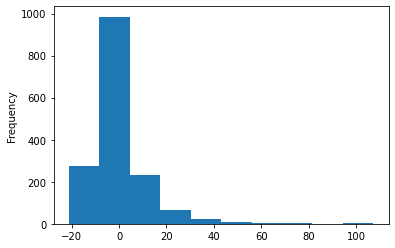

In [43]:
ytrain_school['diff'].plot.hist()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [44]:
xtrain_sch_wexp, xtest_sch_wexp, ytrain_sch_wexp, ytest_sch_wexp = train_test_split(df_data[["S","EXP"]], df_data[y_cols], test_size=0.2, random_state=10)

In [45]:
lin_mod_sch_wexp = LinearRegression()
lin_mod_sch_wexp.fit(xtrain_sch_wexp, ytrain_sch_wexp)
ytrain_sch_wexp["pred"] = lin_mod_sch_wexp.predict(xtrain_sch_wexp)

In [46]:
r2_score(ytrain_sch_wexp.EARNINGS, ytrain_sch_wexp.pred)

0.11145477859925612

### Evaluate the Coefficients of the Model

In [47]:
lin_mod_sch_wexp.coef_

array([[1.826992  , 0.95680635]])

### Analyse the Estimated Values & Regression Residuals

In [48]:
ytrain_sch_wexp['diff'] = ytrain_sch_wexp.EARNINGS - ytrain_sch_wexp.pred

<AxesSubplot:ylabel='Frequency'>

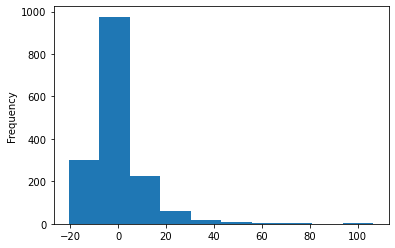

In [49]:
ytrain_sch_wexp["diff"].plot.hist()

# Principal Component Analysis

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA().fit(df_data[x_cols])

In [52]:
pca.explained_variance_ratio_

array([8.97775654e-01, 1.01707745e-01, 5.15324167e-04, 7.44282637e-07,
       4.67584217e-07, 3.37088112e-08, 1.56940119e-08, 3.46504395e-09,
       2.10512117e-09, 1.62612286e-09, 1.56881066e-09, 1.40581282e-09,
       1.18221722e-09, 8.00583254e-10, 6.85262250e-10, 4.36074542e-10,
       3.38573131e-10, 2.87930377e-10, 2.01660436e-10, 1.50159505e-10,
       1.16786254e-10, 9.14173952e-11, 7.45987085e-11, 6.31097033e-11,
       5.98781263e-11, 5.25027858e-11, 4.92637857e-11, 4.57923954e-11,
       4.26463548e-11, 4.09986710e-11, 3.87843545e-11, 3.65633005e-11,
       3.40670082e-11, 3.22427591e-11, 3.10170421e-11, 3.01423024e-11,
       2.92422329e-11, 2.68164700e-11, 2.55687897e-11, 2.40864550e-11,
       2.19346687e-11, 2.13834360e-11, 1.92256790e-11, 1.79629898e-11,
       1.71577497e-11, 1.69558947e-11, 1.62676573e-11, 1.56499136e-11,
       1.46616761e-11, 1.36460209e-11, 1.14732739e-11, 1.13058031e-11,
       1.06972548e-11, 1.00878865e-11, 9.72266240e-12, 9.33060848e-12,
      

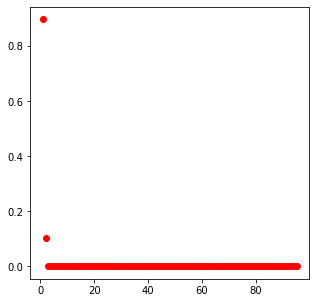

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(x = list(range(1,1+len(pca.explained_variance_ratio_))), y = pca.explained_variance_ratio_, color = 'r')

In [54]:
pca_final = PCA(n_components=2).fit_transform(df_data[x_cols])

In [55]:
pca_final

array([[-29687.4046093 ,  26057.43174207],
       [-87233.81874587,   8101.47875094],
       [ -4494.66607677,  -9921.42915881],
       ...,
       [-14360.04578532, -38603.95470422],
       [-24095.57852722,  14844.50333456],
       [-52704.65286321, -10984.31907177]])

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(pca_final, df_data["EARNINGS"], test_size=0.2, random_state=10)

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [57]:
lin_reg = LinearRegression()

In [58]:
lin_reg.fit(xtrain, ytrain)

LinearRegression()

In [59]:
ypred = lin_reg.predict(xtest)

In [60]:
r2_score(ytest, ypred)

0.10452467483596228

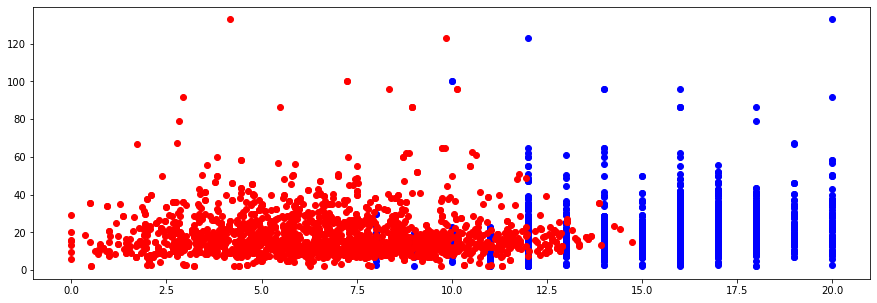

In [61]:
plt.figure(figsize=(15,5))
plt.scatter(df_data["S"], df_data["EARNINGS"], color="b")
plt.scatter(df_data["EXP"], df_data["EARNINGS"], color="r")
plt.show()

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

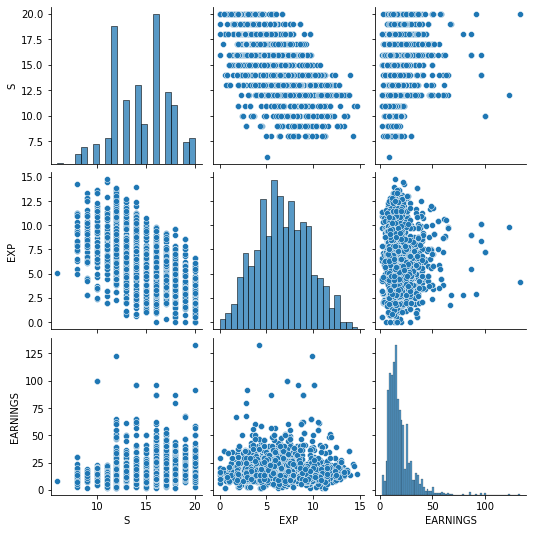

In [63]:
sns.pairplot(df_data[["S","EXP","EARNINGS"]])